<a href="https://colab.research.google.com/github/lorenzcipher/Hackathon-Junction2021/blob/main/The_SVM_model_for_The_Smartest_Maintenance_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import  preprocessing

## **Importing the dataset**

In [3]:
#load data train
df_train = pd.read_csv("train.csv", sep=",", encoding="utf-8")

Satisfying the email request

In [ ]:
df_train.replace('0113eba6-6928-461a-b994-35a0b2eb9f4e', np.nan)

#**Data shape**


In [5]:
df_train.shape

(115475, 13)

#**Data types**


In [6]:
df_train.dtypes

case_id                           object
equipment_id                      object
completion_date                   object
action_recommendation_id          object
action_recommendation_type        object
action_recommendation_category    object
equipment_area                    object
usage_type                        object
speed_category                     int64
load_category                      int64
floors_category                    int64
equipment_category                object
feedback                           int64
dtype: object

# **Check for NaN values**

In [7]:
(df_train.isna().sum() / df_train.shape[0]).sort_values()

case_id                           0.0
equipment_id                      0.0
completion_date                   0.0
action_recommendation_id          0.0
action_recommendation_type        0.0
action_recommendation_category    0.0
equipment_area                    0.0
usage_type                        0.0
speed_category                    0.0
load_category                     0.0
floors_category                   0.0
equipment_category                0.0
feedback                          0.0
dtype: float64

# **Droping the useless columns**

In [8]:
df_train.drop(['equipment_id', 'case_id', 'action_recommendation_id', 'equipment_area','completion_date'], axis=1, inplace=True)
df_train

,action_recommendation_type,action_recommendation_category,usage_type,speed_category,load_category,floors_category,equipment_category,feedback
0,art01,arc03,ut012,7,6,8,tp006,1
1,art02,arc03,ut005,4,6,2,tp001,1
2,art02,arc03,ut011,6,6,7,tp006,1
3,art01,arc03,ut005,8,7,8,tp014,1
4,art02,arc03,ut011,7,6,8,tp013,1
...,...,...,...,...,...,...,...,...
115470,art01,arc03,ut011,6,7,8,tp005,1
115471,art02,arc01,ut001,4,3,1,tp015,1
115472,art01,arc02,ut011,2,1,4,tp002,1
115473,art01,arc02,ut011,2,1,4,tp002,1


# **Data vizualisation**

# Visualization of the missing data

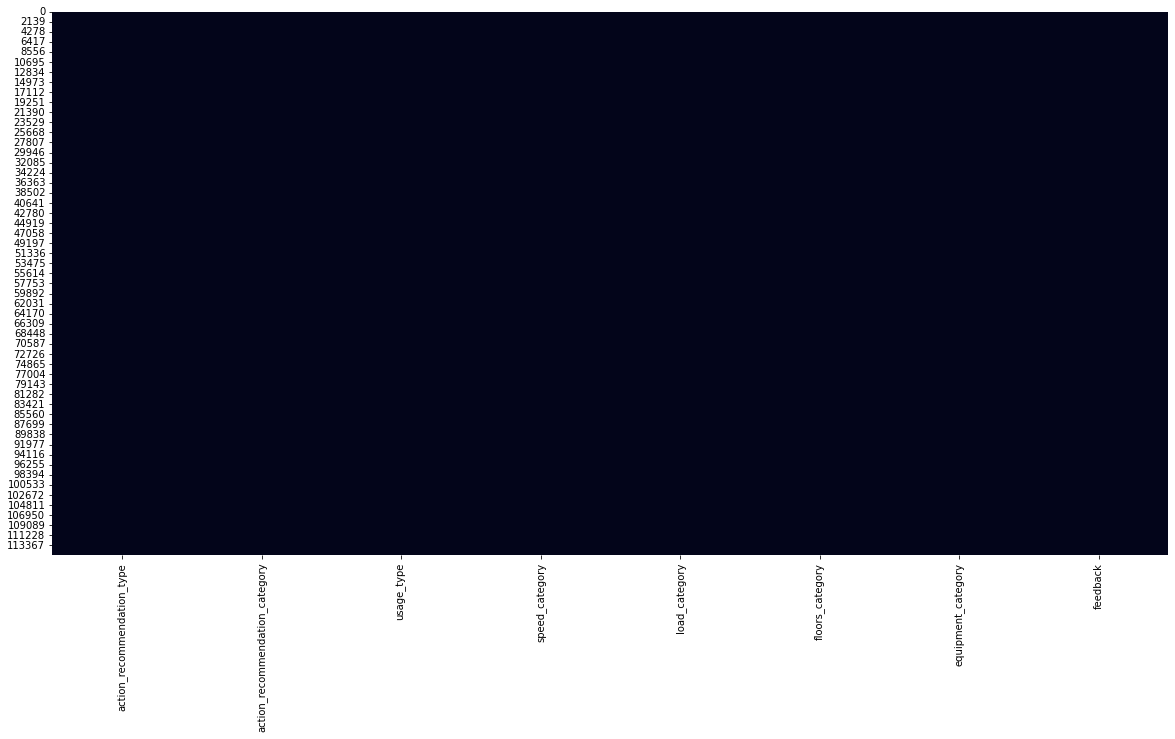

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isna(), cbar=False)

# Visualization of independent "object" data 

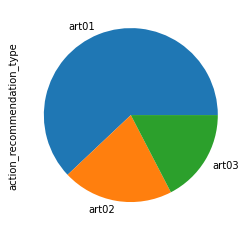

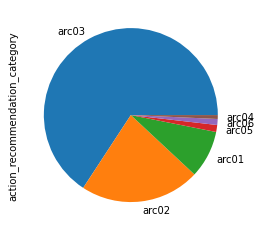

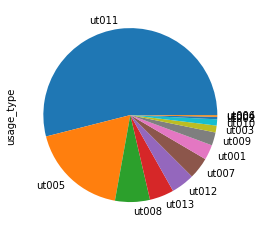

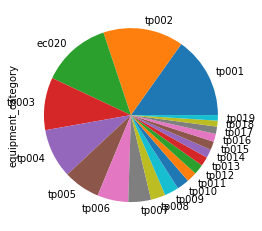

In [10]:
for col in df_train.select_dtypes('object'):
    plt.figure()
    df_train[col].value_counts().plot.pie()

# Visualization of the "int" data

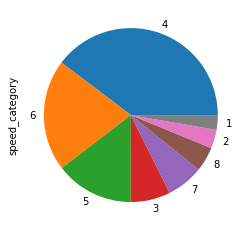

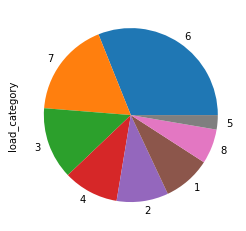

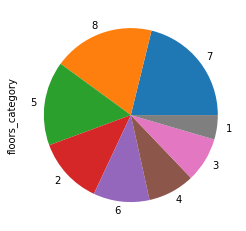

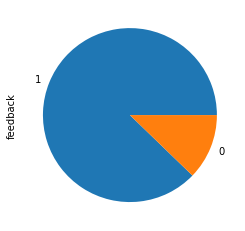

In [12]:
for col in df_train.select_dtypes('int'):
    plt.figure()
    df_train[col].value_counts().plot.pie()

# Visualization of the variables / target

In [13]:
positive_df = df_train[df_train['feedback'] ==1]
negative_df = df_train[df_train['feedback'] ==0]

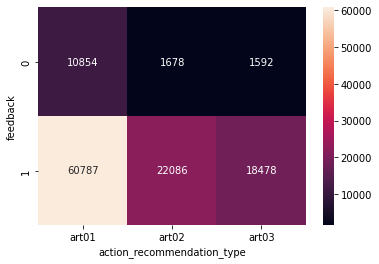

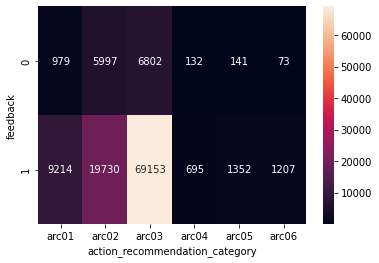

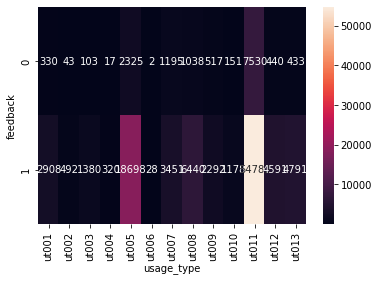

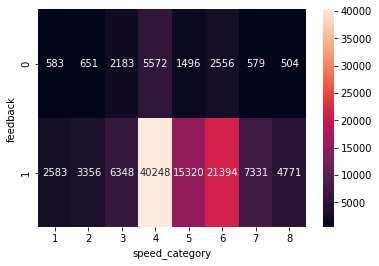

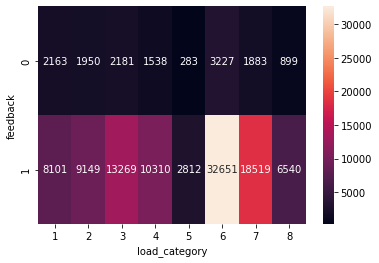

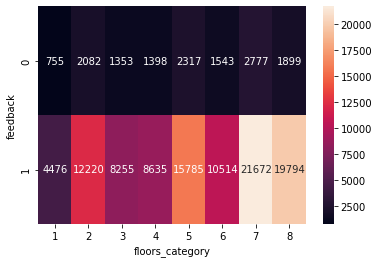

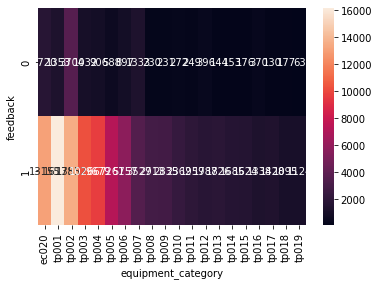

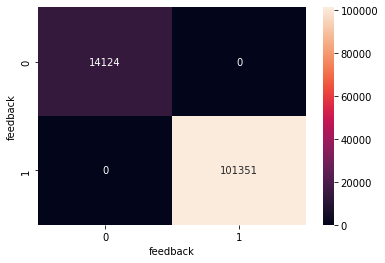

In [14]:
for col in df_train.columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df_train['feedback'], df_train[col]), annot=True, fmt='d')

#**Encoding the catgorical data**

In [15]:
quali_df = df_train[['action_recommendation_type', 'action_recommendation_category', 'usage_type', 'equipment_category']]

enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(quali_df)
onehotlabels = enc.transform(quali_df).toarray()
onehotlabels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [16]:
quanti_vars = df_train[["speed_category", "load_category", "floors_category"]].to_numpy()
new_df = np.concatenate((onehotlabels, quanti_vars), axis=1)

new_df

array([[1., 0., 0., ..., 7., 6., 8.],
       [0., 1., 0., ..., 4., 6., 2.],
       [0., 1., 0., ..., 6., 6., 7.],
       ...,
       [1., 0., 0., ..., 2., 1., 4.],
       [1., 0., 0., ..., 2., 1., 4.],
       [1., 0., 0., ..., 6., 4., 8.]])

# **Data split train/validation**

In [17]:
X_train, X_val, y_train, y_val = train_test_split(new_df, df_train["feedback"], test_size=0.2, random_state=42, stratify=df_train["feedback"])

In [18]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [19]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

# **Predict the response for test dataset**

In [20]:
y_pred = clf.predict(X_val)


In [21]:
precision =metrics.precision_score(y_val, y_pred,average='weighted')
precision

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7703206926819067

In [22]:
recall =metrics.recall_score(y_val, y_pred,average='weighted')
recall

0.877679151331457

In [23]:
F2 =metrics.fbeta_score(y_val, y_pred, beta=2)
F2

0.9728821694264459

#**Random Forest**

In [24]:
clf_rf = RandomForestClassifier(n_estimators=100)

In [25]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
y_pred_rf=clf_rf.predict(X_val)

In [27]:
precision_rf =metrics.precision_score(y_val, y_pred_rf,average='weighted')
precision_rf

0.8611781907315629

In [28]:
recall_rf =metrics.recall_score(y_val, y_pred_rf,average='weighted')
recall_rf

0.8856029443602511

In [29]:
F2_rf =metrics.fbeta_score(y_val, y_pred_rf, beta=2)
F2_rf

0.9629769587039513

#**Logistic Regression**

In [30]:
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
y_pred_reg=logreg.predict(X_val)

In [33]:
precision_reg =metrics.precision_score(y_val, y_pred_reg,average='weighted')
recall_reg =metrics.recall_score(y_val, y_pred_reg,average='weighted')
F2_reg =metrics.fbeta_score(y_val, y_pred_reg, beta=2)
F2_reg


0.9725502621118728

#**TEST**

TEST MODEL

Cleaning Data

In [37]:
#load data train
df_test = pd.read_csv("test.csv", sep=",", encoding="utf-8")
df_copy = df_test.copy()

df_test.replace('62bf183c-eb55-4da1-b654-f245b320c6c0', np.nan)



df_test.drop(['equipment_id', 'case_id', 'action_recommendation_id', 'equipment_area','completion_date'], axis=1, inplace=True)


quali_df_test = df_test[['action_recommendation_type', 'action_recommendation_category', 'usage_type', 'equipment_category']]


enc_test = preprocessing.OneHotEncoder(handle_unknown='ignore')


enc_test.fit(quali_df_test)


onehotlabels_test = enc.transform(quali_df_test).toarray()


quanti_vars_test = df_test[["speed_category", "load_category", "floors_category"]].to_numpy()

new_df_test = np.concatenate((onehotlabels_test, quanti_vars_test), axis=1)







Test

In [39]:
y_pred_test = clf.predict(new_df_test)

submit= df_copy[['case_id','action_recommendation_id']].to_numpy()

submit=pd.DataFrame(submit,columns=['case_id','action_recommendation_id'])


submit.insert(2, "feedback", y_pred_test, allow_duplicates=False)

submit.to_csv('/content/submit_final.csv', index=False)

# NB: We have treated the data of KONE and CGI hackathon
#First we did a data Exploratory analysis, data pre-prossecing and the learning 
#Our problem is a classification problem so we used the classification models : Logistic regression, SVM and random forest 
#We selected the SVM model based on the amazing results that our model gived 